In [2]:
#Social Media Analytics
#Lab Task 1
#Indian Youtube videos Analysis

In [3]:
#Name: Sabahat Shaik 
#SID:20WU0101019

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [41]:
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [42]:
PLOT_COLORS = ["#2a9d8f","#344e41","#03045e", "#9a031e","#ff6d00"]
pd.options.display.float_format='{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(9, 4), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#03045E')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [43]:
df= pd.read_csv("C:/Users/Dell/Desktop/SaBaHaT/SMA/lab/INvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [44]:
#Q1. How many views do trending videos have?

#To find the number of views of the trending videos we can use the function:

df['views'].sum()

#the total number of views of the trending videos is 39610961029. 

39610961029

In [45]:
df[['title', 'views']]

,title,views
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1096327
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",590101
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988
3,Eruma Saani | Tamil vs English,1242680
4,why Samantha became EMOTIONAL @ Samantha naga ...,464015
...,...,...
37347,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,214378
37348,Seetha | Flowers | Ep# 364,406828
37349,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,386319
37350,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,130263


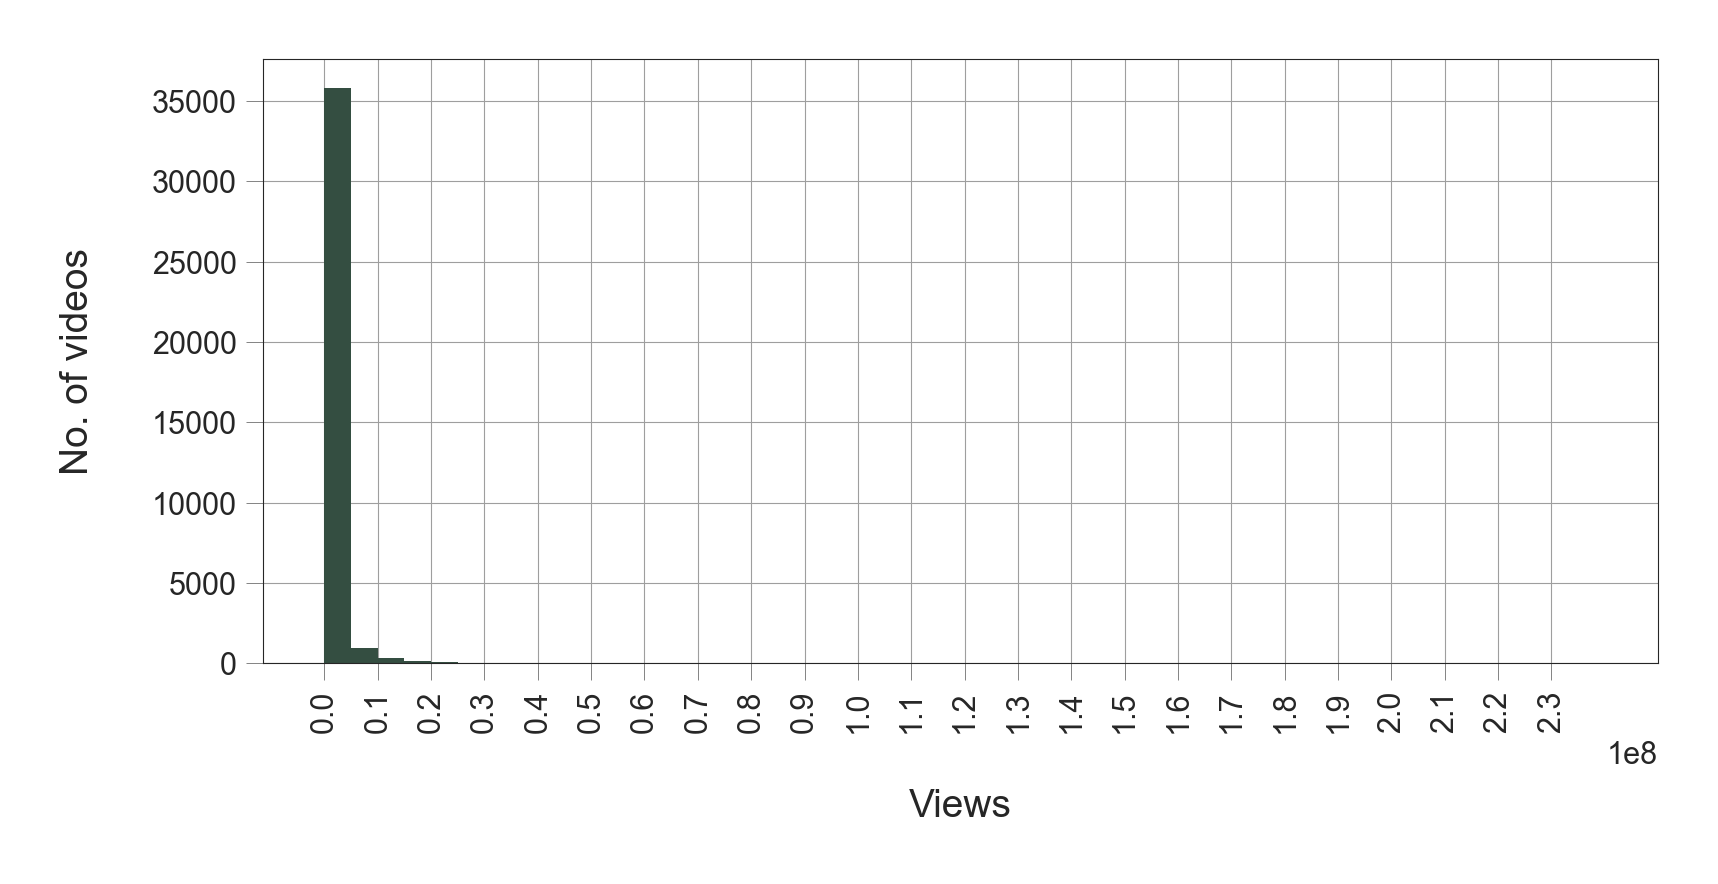

In [46]:

#this information can be graphically represented as such:
#graphical representation of all videos and their views in 1e7, i.e, 10 million: 
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[1], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

In [47]:
#Q2 Do most of them have a large number of views? Is having a large number of views required for a video to become trending?

#if we classify a margin which distingusishes between large and medium number of views as large views exceeding 1 million, 
# and medium views lower than that. Then the percentage of videos which have large number of views are calculated as:

df[df['views'] > 1e6]['views'].count() / df['views'].count() * 100

#around 20.4% of videos have large number of views, i.e., more than a million views

20.43264082244592

In [48]:
#percentage if videos with less than 1 million views: 
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100
#therefore, only 20.5% of the videos with more than 1 million views are trending where are the percentage of trending videos
#less than 1 million views is around 79.5%. This answers the question given that most of the trending videos do not have large 
#number of views. Large number of views is not required for a video to be trending. 

79.56735917755408

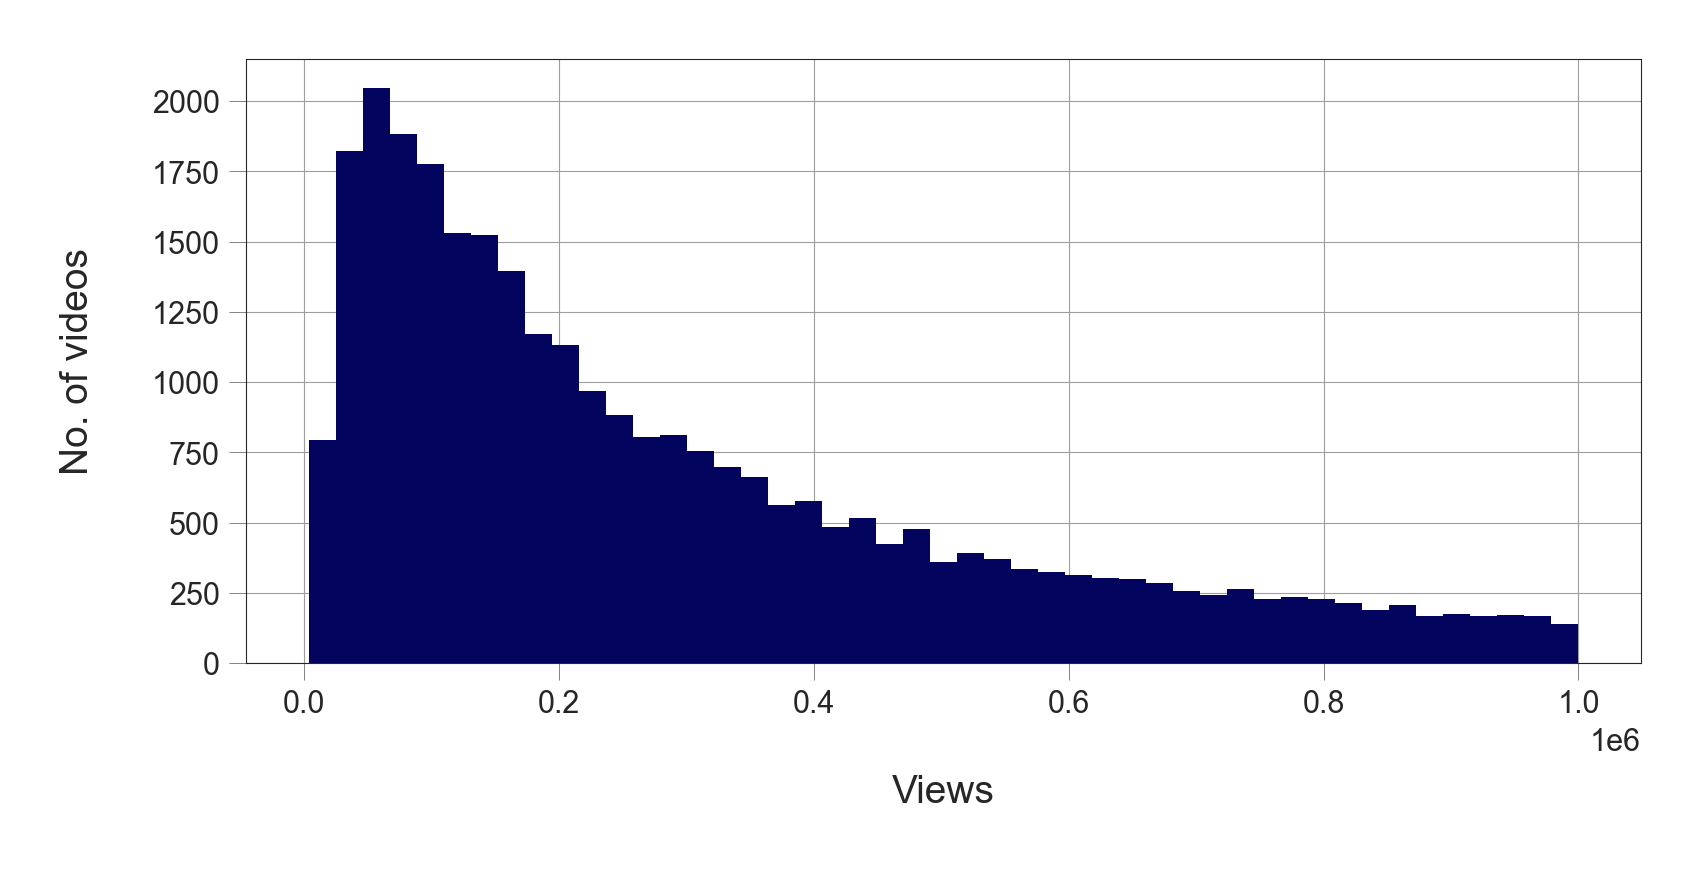

In [49]:
#the graphical representation of videos who have less than 1 million views is: 
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 1e6]["views"], kde=False, 
                 color=PLOT_COLORS[2], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

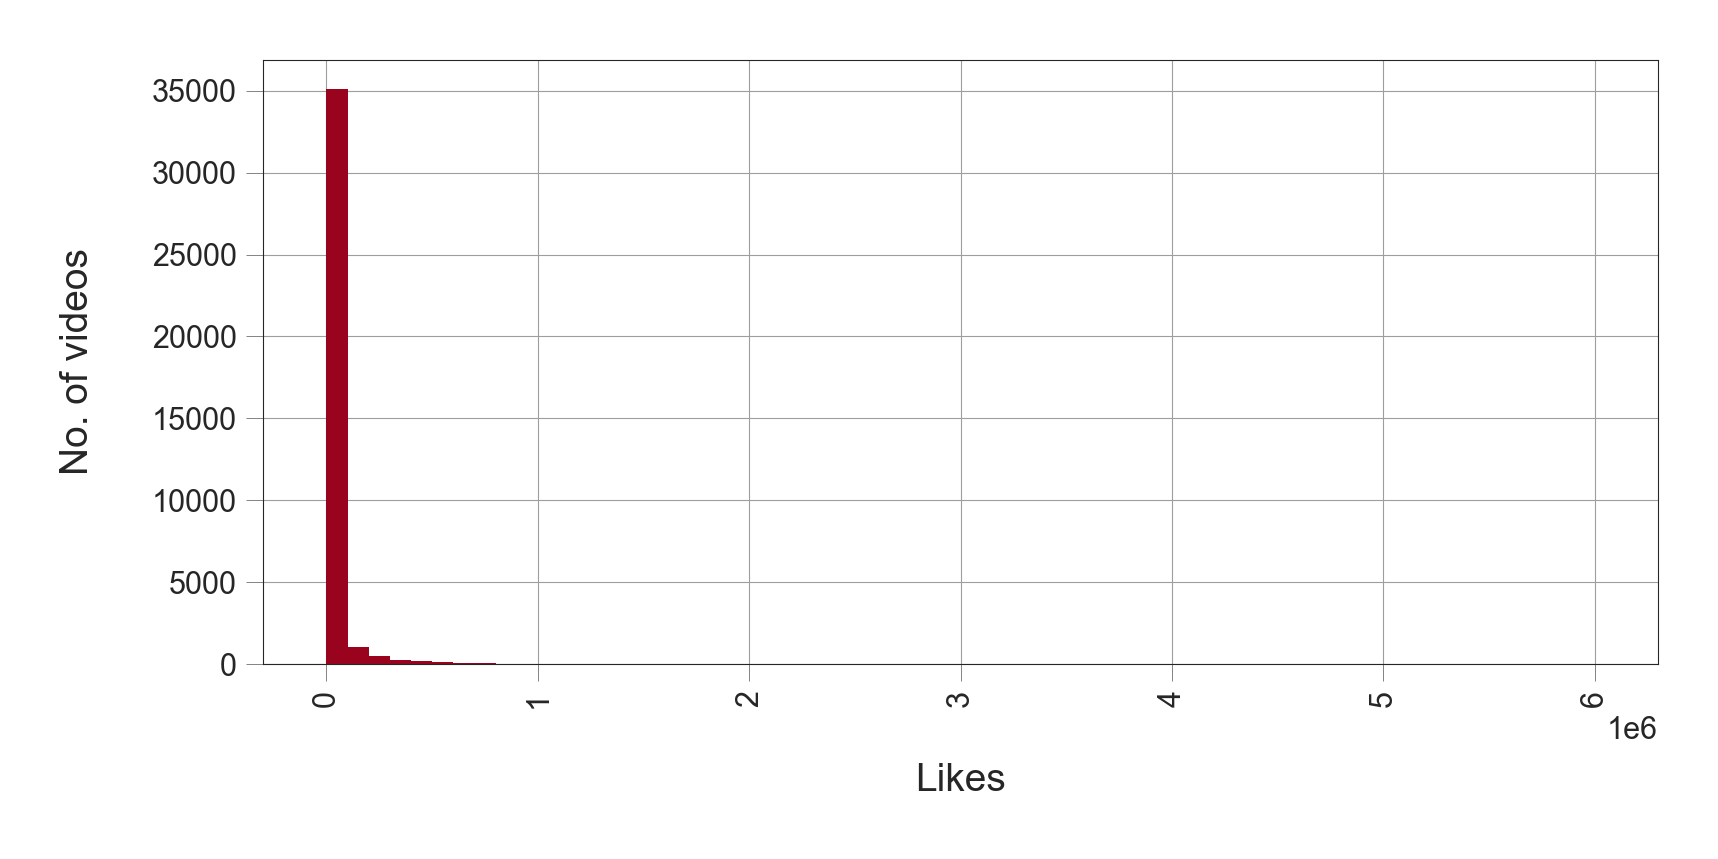

In [50]:
#Q3. The same questions above, but applied to likes and comment count instead of views.

#for likes: the graphical representation of likes on all videos is as follows:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[3], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

In [51]:
#the percentage of videos having more than 50k likes is only 10.5% : 
df[df['likes'] > 5e4]['likes'].count() / df['likes'].count() * 100

10.583101306489612

In [52]:
#where as the percentage of videos having less than 50k likes is around 89.4%:
df[df['likes'] < 5e4]['likes'].count() / df['likes'].count() * 100

89.41689869351038

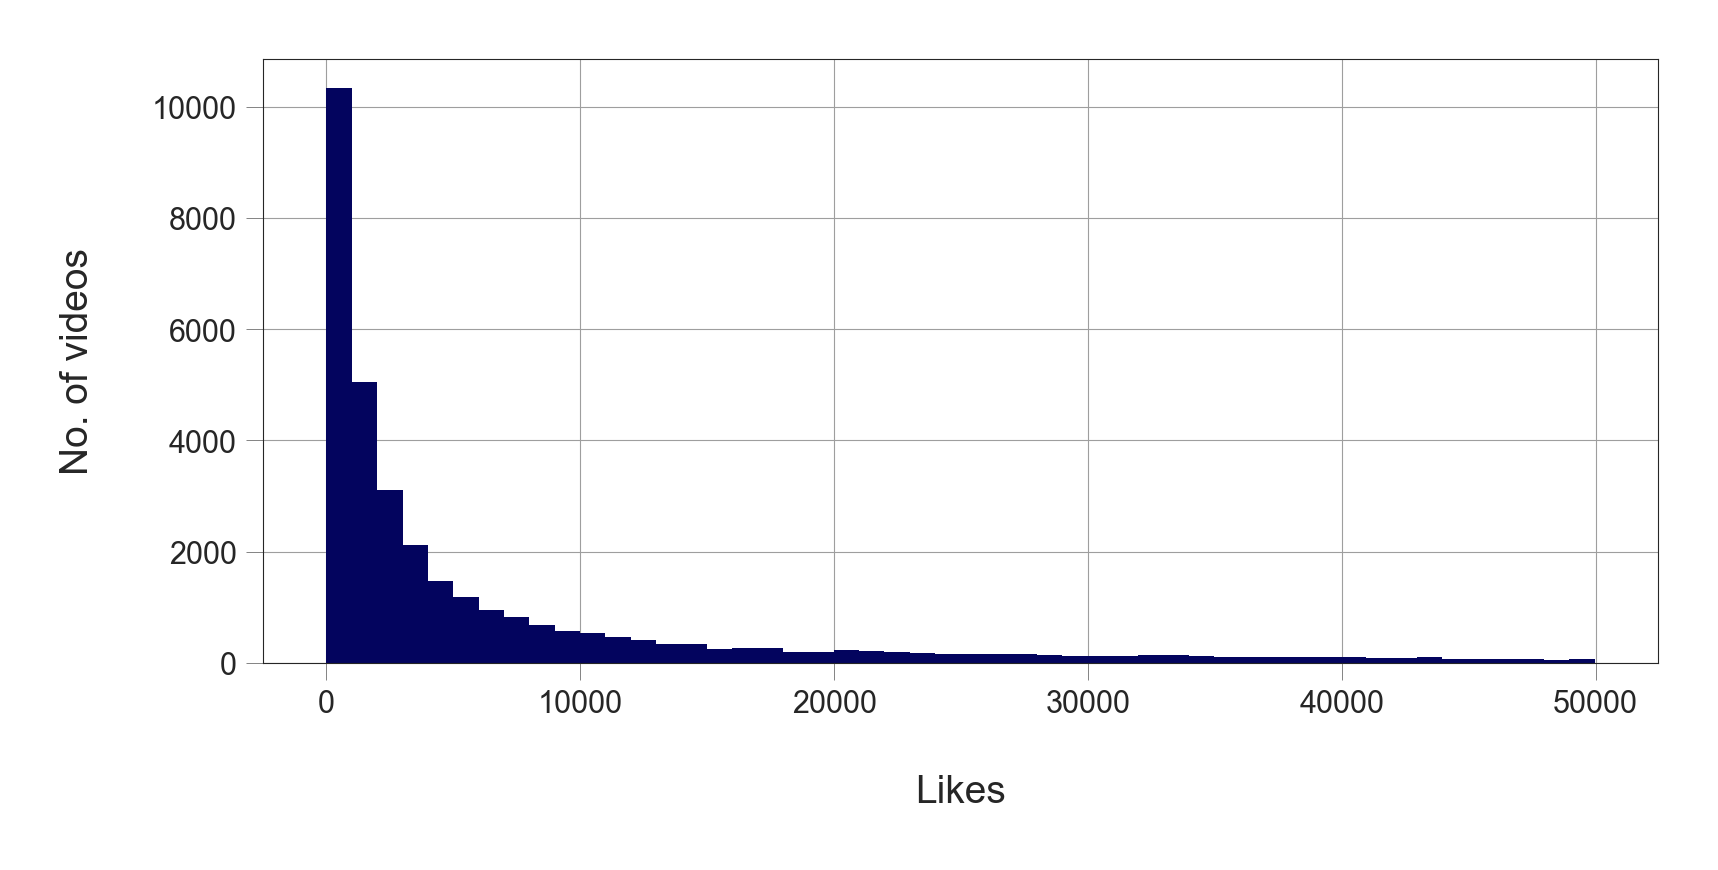

In [53]:
#graphical representation of trending videos which have less than 50k likes is:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 5e4]["likes"], kde=False, 
                 color=PLOT_COLORS[2], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

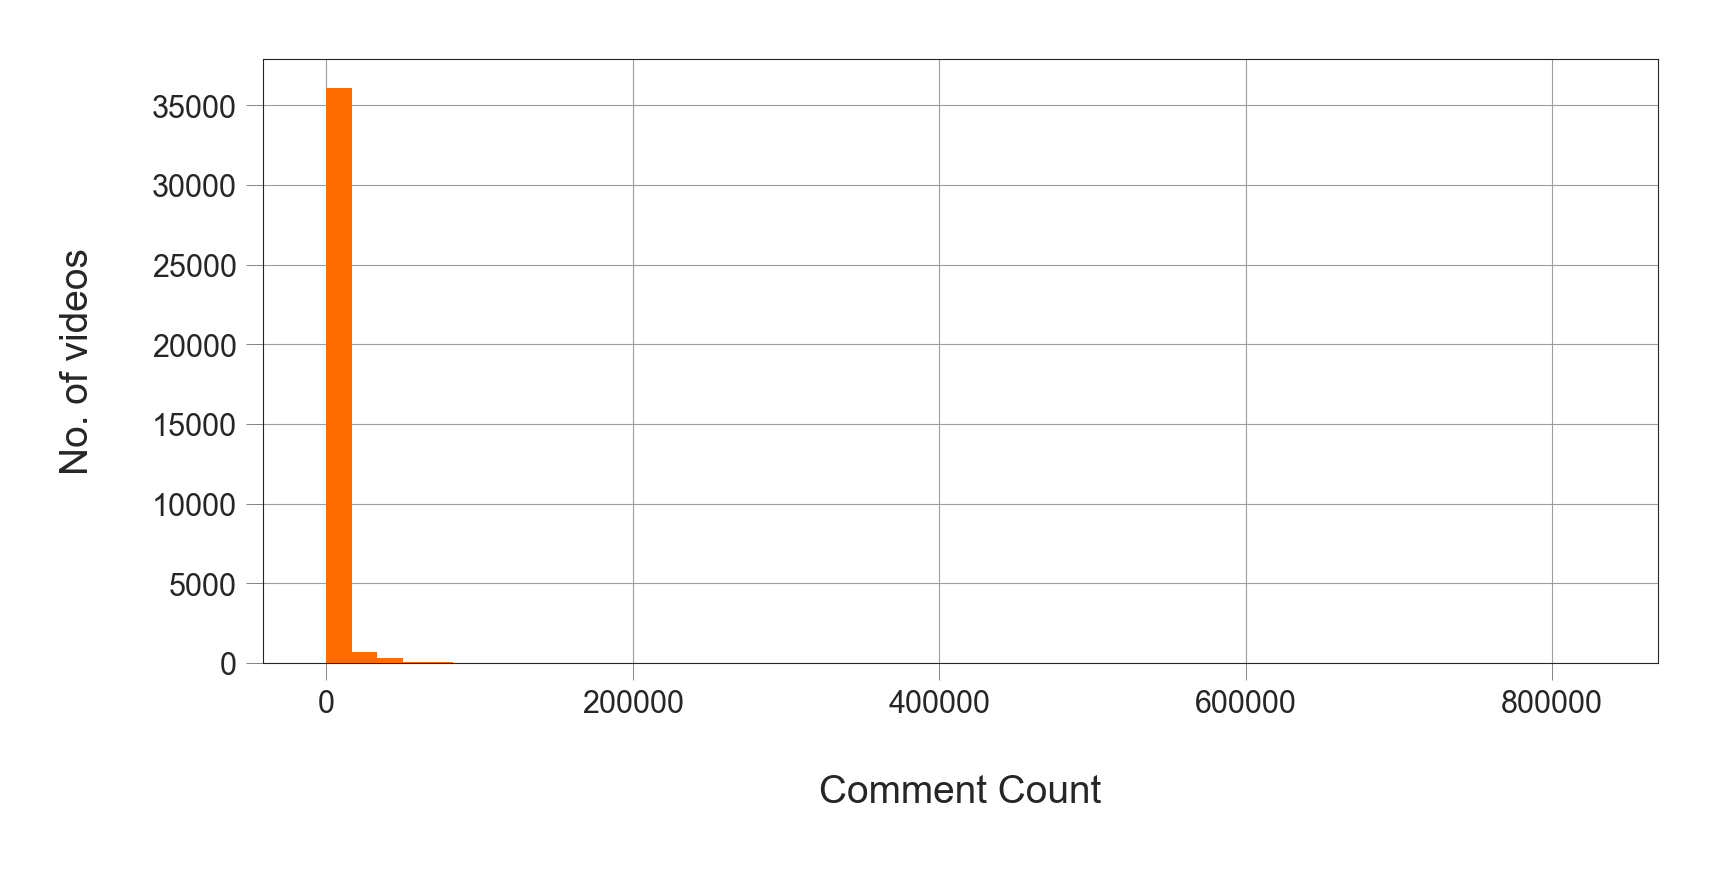

In [54]:
#The same is applied to comment counts:
#the number of comments under all videos is represented graphically as: 
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [55]:
#the percentage of videos which have more than 15k comments is around 3.6%: 
df[df['comment_count'] > 15000]['comment_count'].count() / df['comment_count'].count() * 100

3.670486185478689

In [56]:
#the percentage of videos which have less than 15k comments is about 96.3%: 
df[df['comment_count'] < 15000]['comment_count'].count() / df['comment_count'].count() * 100

96.3295138145213

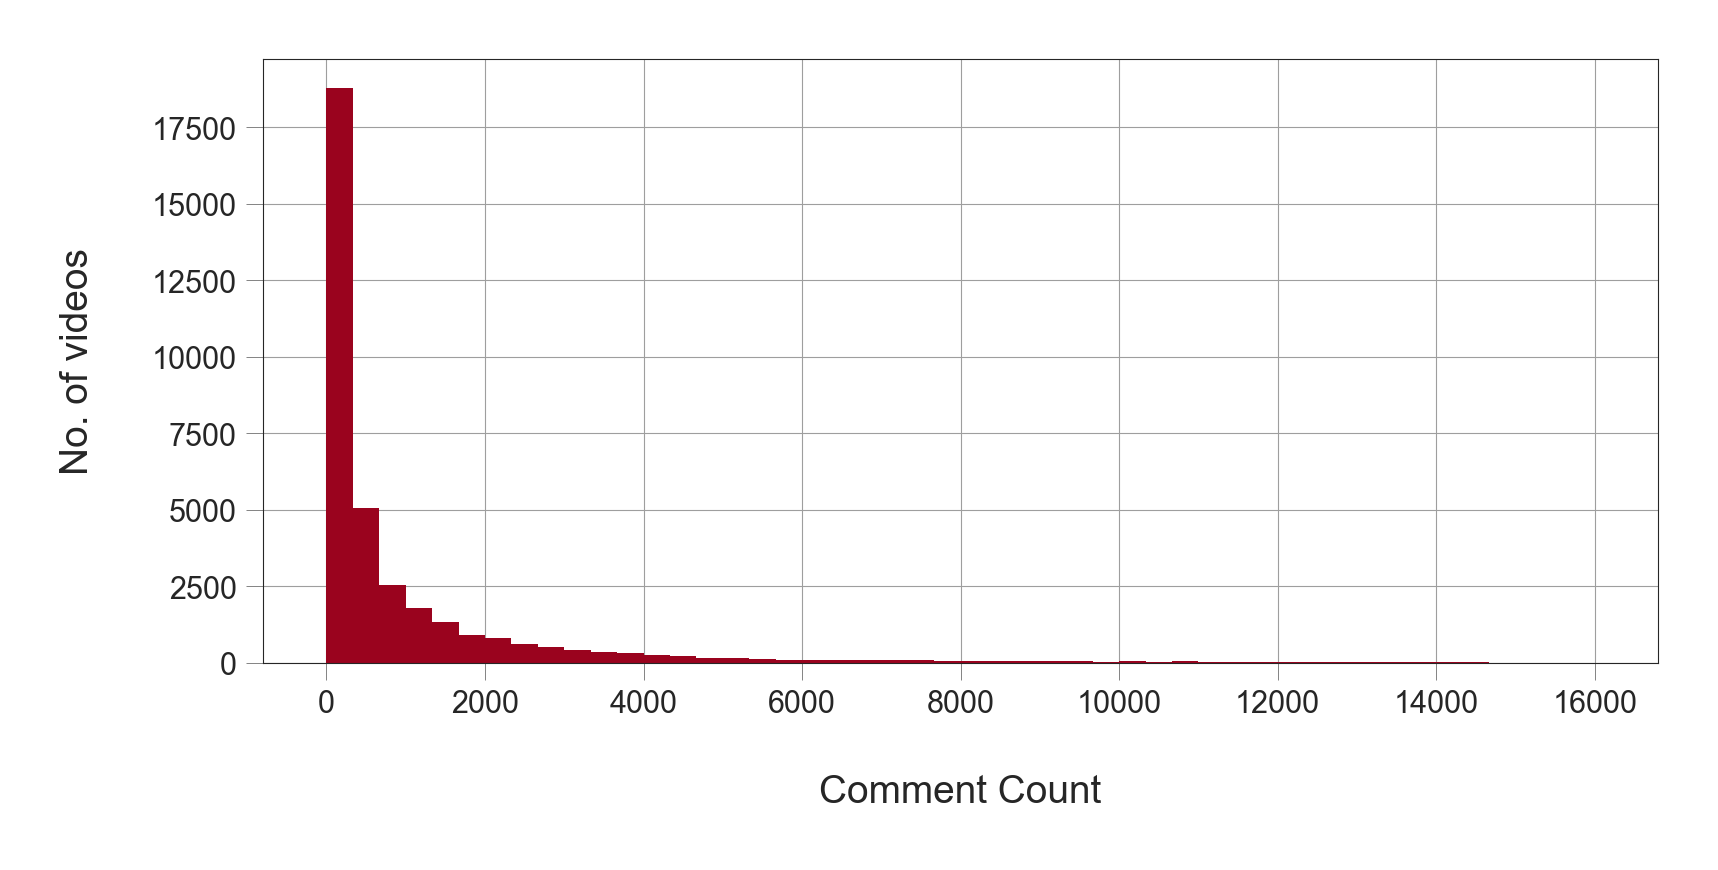

In [57]:
#the number of videos with less than 15k comments is represented graphically as: 
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 15000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[3], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 1.6e4, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [58]:
#Most of the trending videos listed do not have a large number of views, comments or likes. They usually have less than 1
#million views, less than 50 thousand likes and less than 15 thousnd comments. through this we conclude that it is not necessary
#for a video to have large  number of likes and comments for it to be trending. 

In [59]:
#Q4. Which video remained the most on the trendin-videos list?
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,36791
unique,16307,205,16721,1426,16339,12578,16523,13992
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,511,200,19,284,18,1381,16,166


In [63]:
#Q5. How many trending videos contain a fully-capitalized word in their titles?

#We can find the number of videos that contain a fully capitalized word in their title.
df["contains_capitalized"].value_counts()
#therefore 14878 which is about 40% of videos have a fully capitaized word in their titles.

False    22474
True     14878
Name: contains_capitalized, dtype: int64

In [64]:
#the percenatge of videos which have a fully capitalized word in the title is:
df["contains_capitalized"].value_counts(normalize=True)

False   0.60
True    0.40
Name: contains_capitalized, dtype: float64

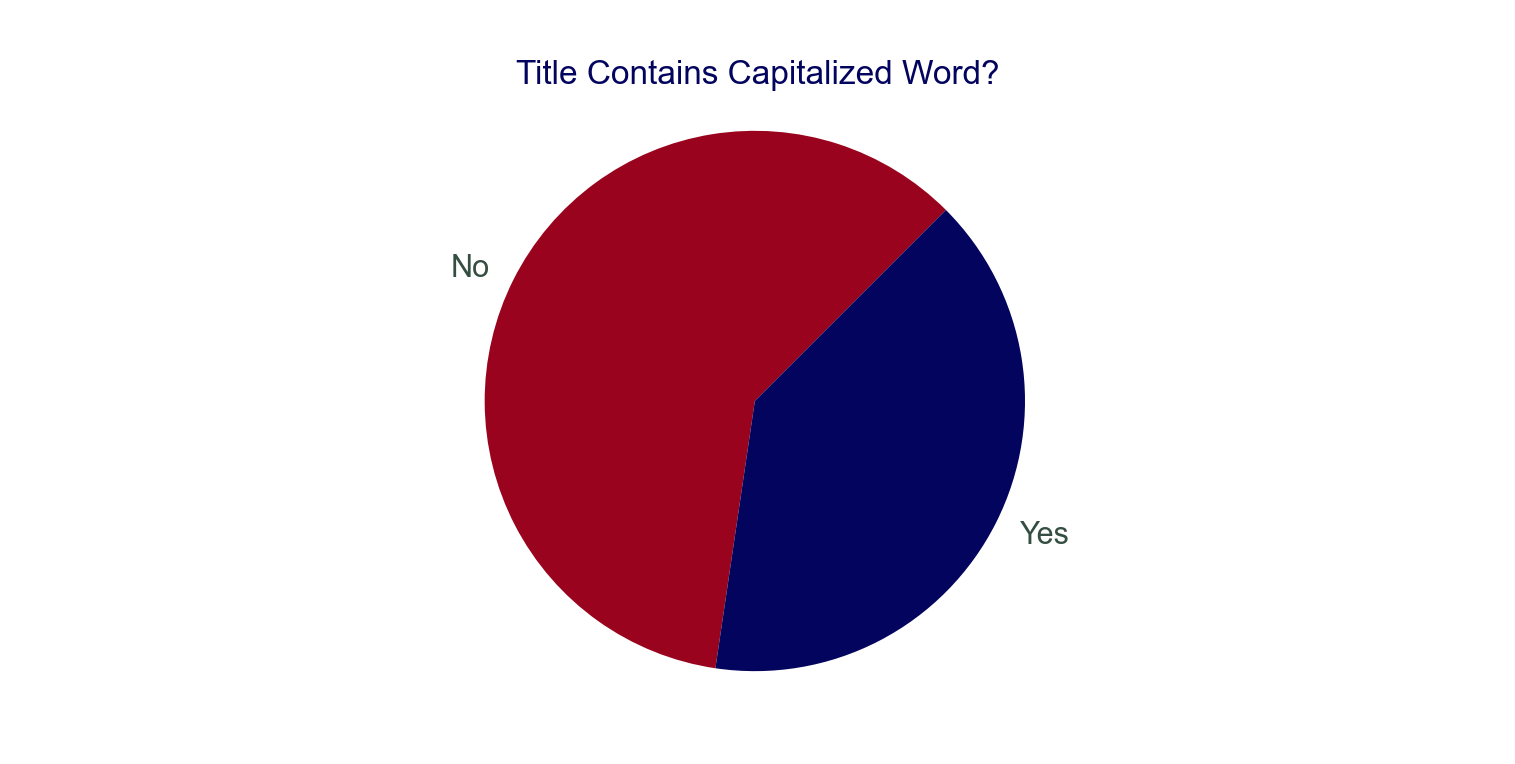

In [62]:
#this data can be represented pictorially using a pie chart as follows:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=[PLOT_COLORS[3], PLOT_COLORS[2]], textprops={'color': PLOT_COLORS[1]}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

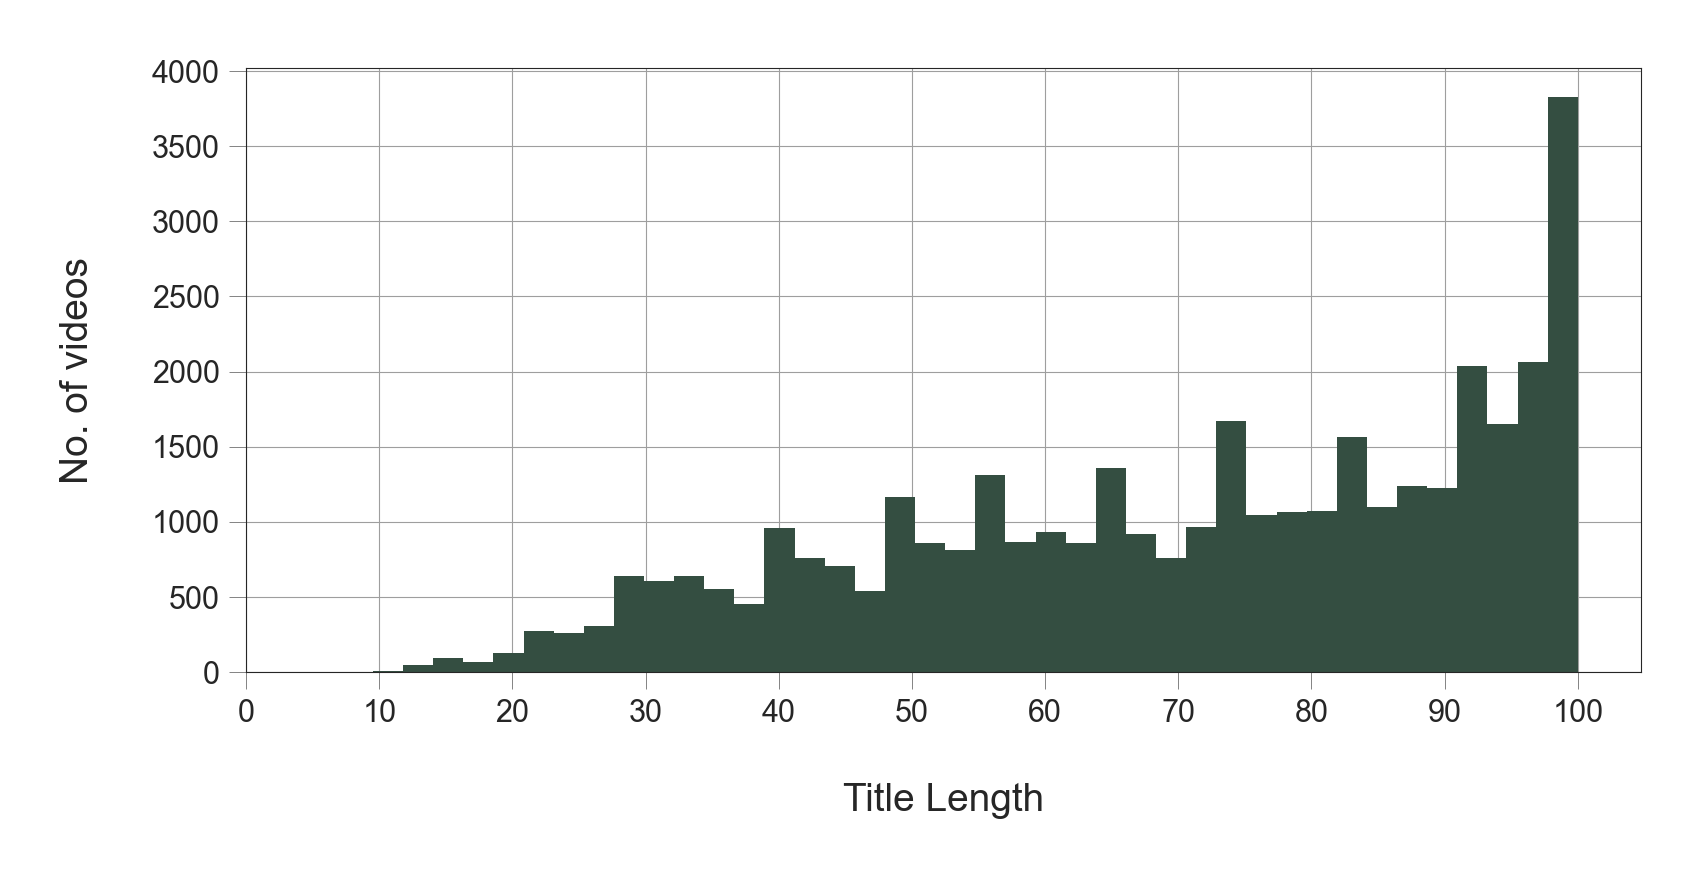

In [7]:
#Q6. What are the lengths of trending video titles? Is this length related to the video becoming trendy?

# we can find the length of trending video titles in a graphical way as: 
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[1], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

#this graph indicates that more than 3500 videos have a title lenght of 100 characters and very few of them have title 
#length lower than 15 characters

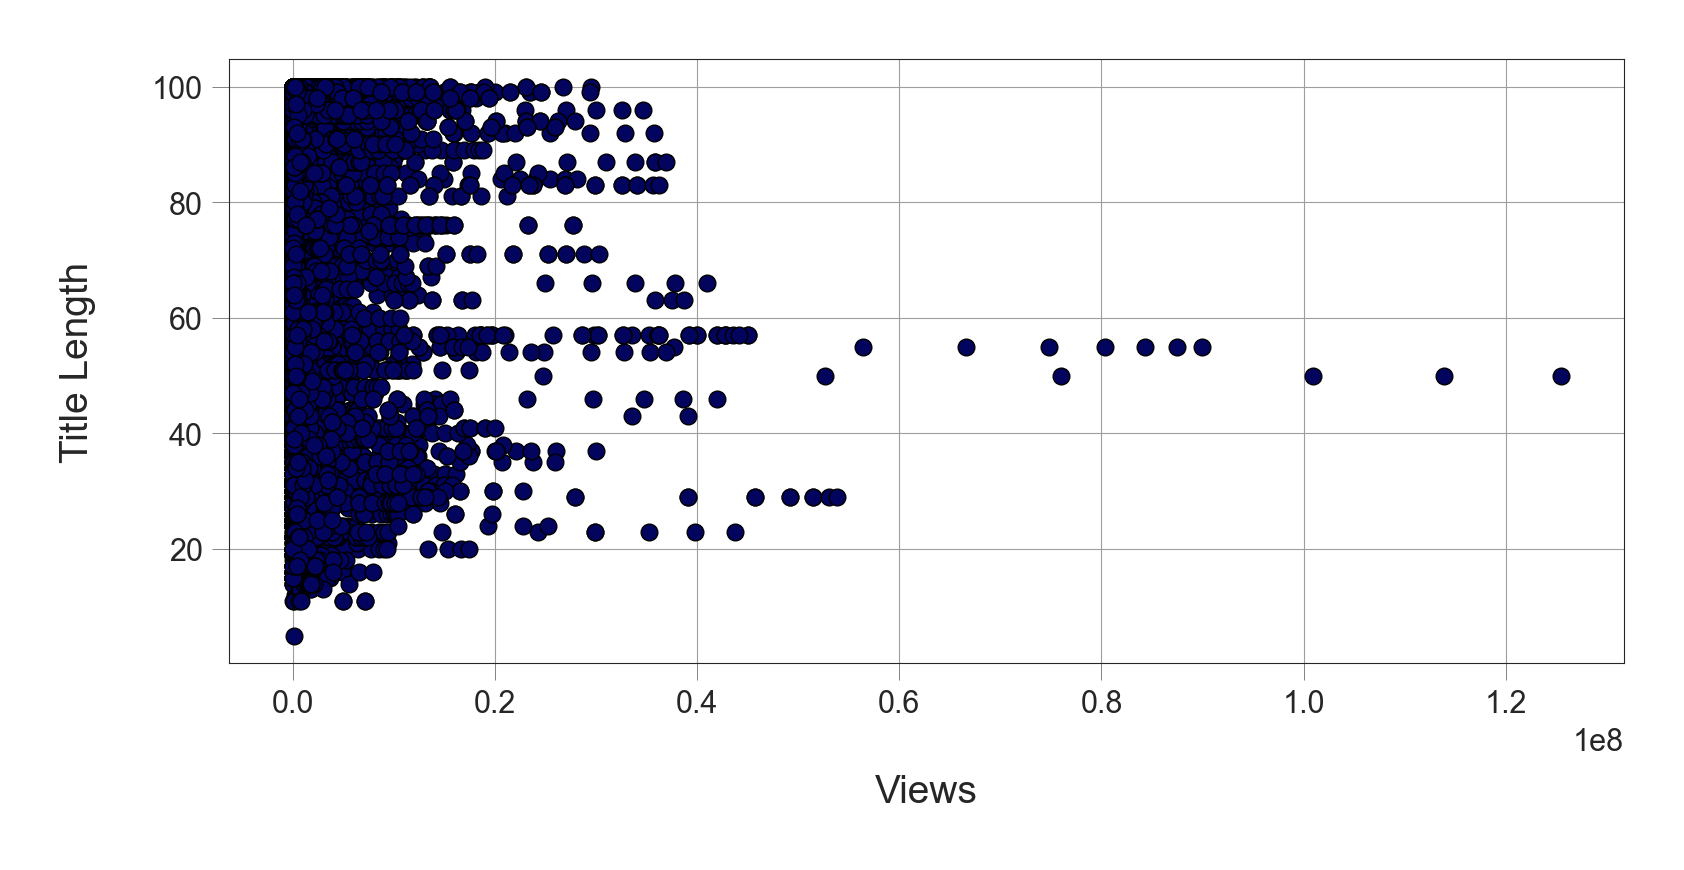

In [8]:
#to see if the title length is related to the video becoming trendy, we can plot a scatter plot as the following: 

fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

#this plot shows that some of the videos of average title length have much more views. But this doesnt indicate that a video
#needs to have a large length of title to become trendy. The length of the title is not related to the video being trendy.

In [9]:
#Q7 How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? 
#How are they connected?

#The correlation between views, likes, dislikes and all the other attributes is as follows:

df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,1.00,-0.18,-0.13,-0.04,-0.04,0.04,0.06,-0.05,-0.16
views,-0.18,1.00,0.85,0.54,0.67,-0.03,-0.03,0.00,-0.05
likes,-0.13,0.85,1.00,0.49,0.78,-0.05,-0.04,0.03,-0.17
dislikes,-0.04,0.54,0.49,1.00,0.71,-0.01,-0.02,0.00,-0.03
comment_count,-0.04,0.67,0.78,0.71,1.00,-0.03,-0.02,0.02,-0.12
comments_disabled,0.04,-0.03,-0.05,-0.01,-0.03,1.00,0.35,-0.00,0.09
ratings_disabled,0.06,-0.03,-0.04,-0.02,-0.02,0.35,1.00,-0.00,0.05
video_error_or_removed,-0.05,0.00,0.03,0.00,0.02,-0.00,-0.00,1.00,-0.03
title_length,-0.16,-0.05,-0.17,-0.03,-0.12,0.09,0.05,-0.03,1.00


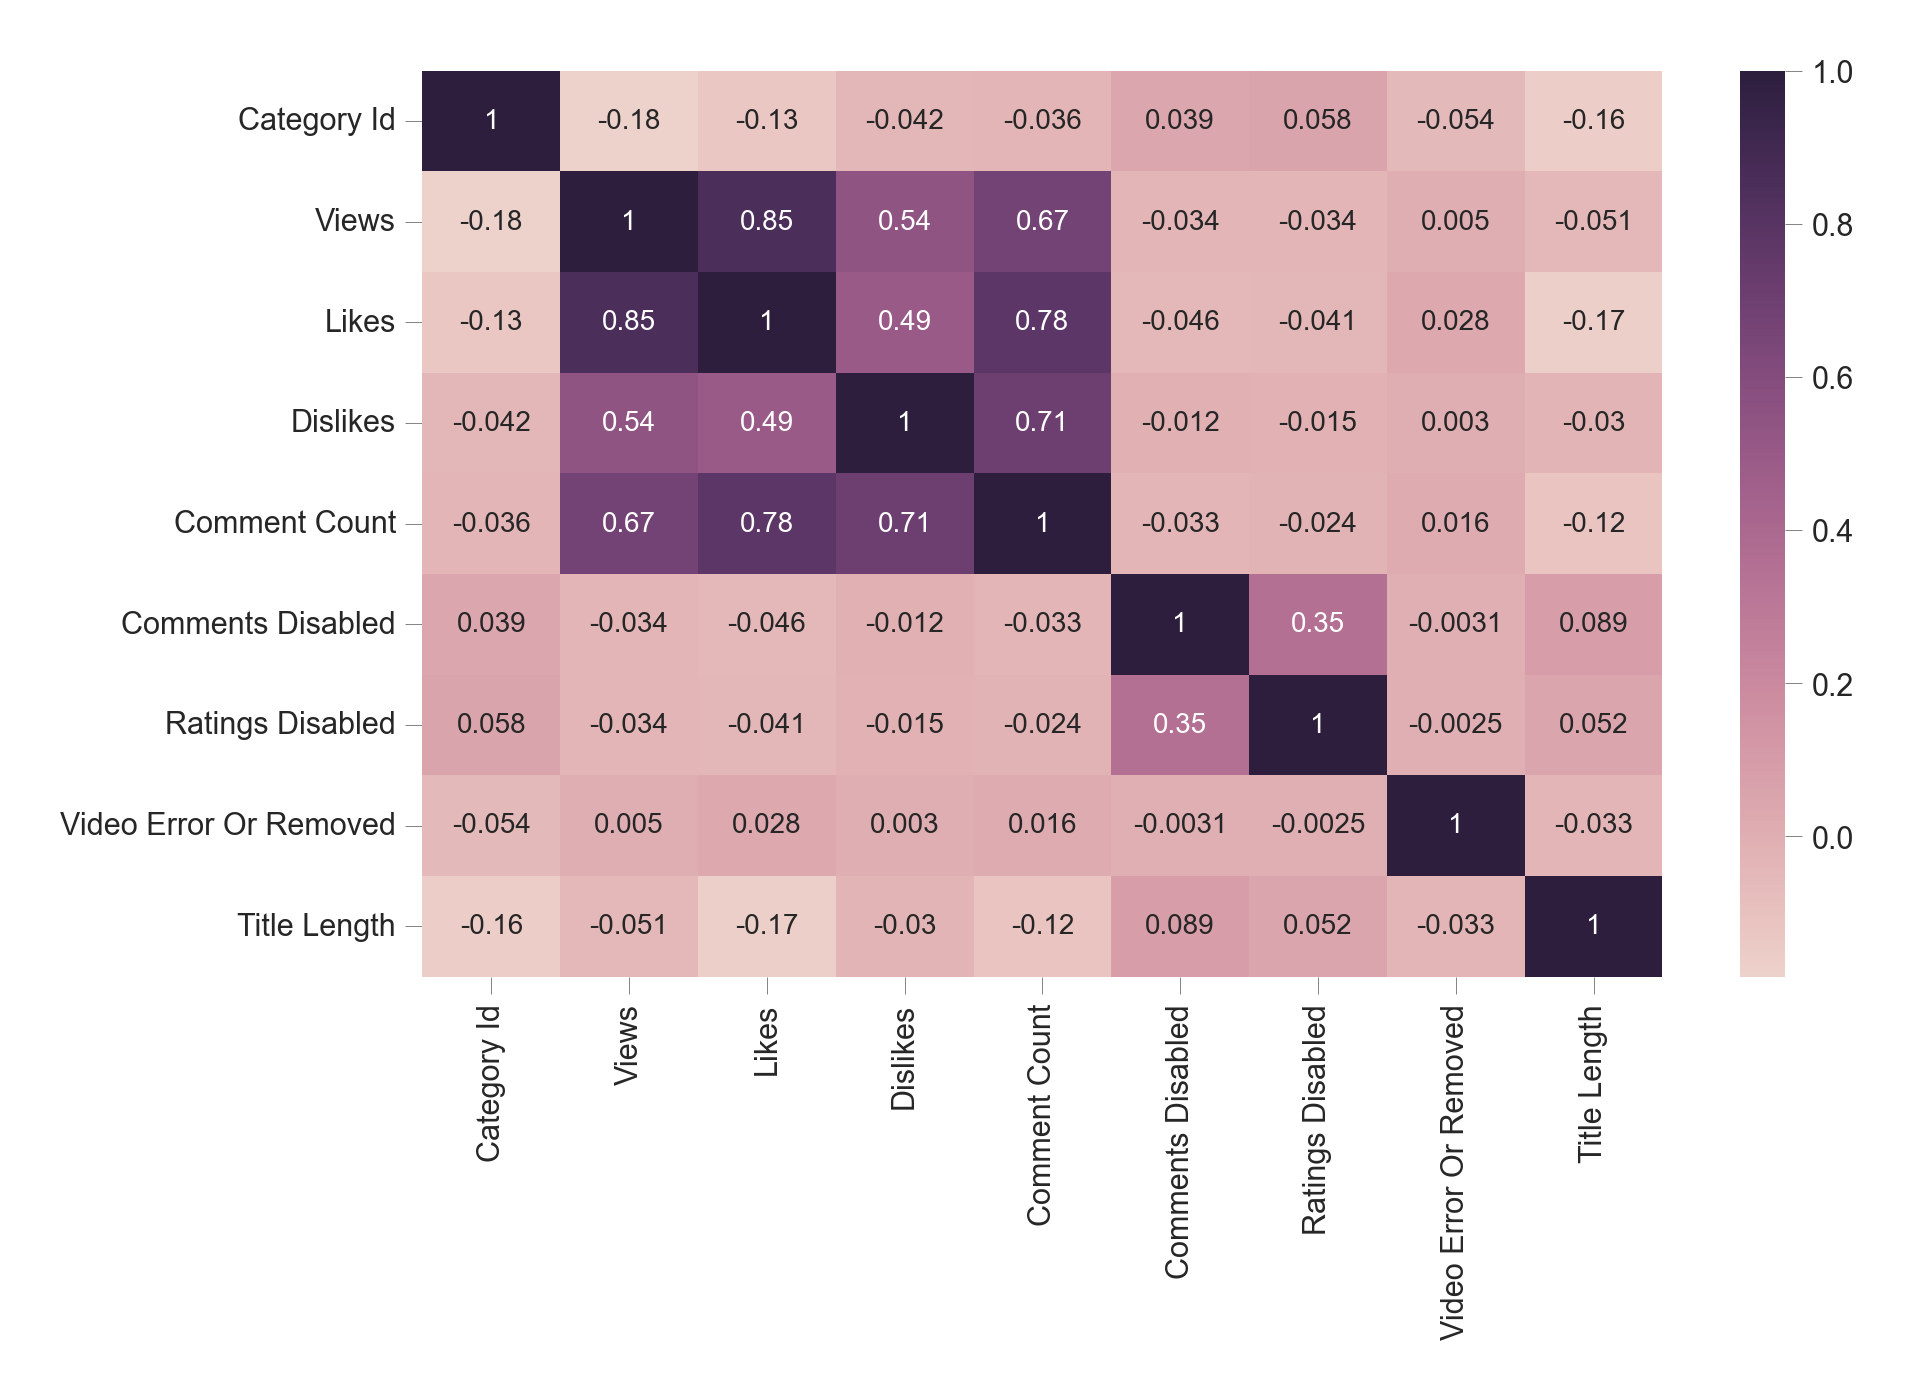

In [10]:
#the relation between these attributes can be represented as:

h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), 
                ax=ax)

#the dark purple colour represents a correlation of 1. Each attribute wil have a correlation of 1 with itself. 
#As the colour gets lighter the correlation decreases among each other, this means that when one variable increases, 
#the other variable decreases.

In [11]:
#Q8. What are the most common words in trending video titles?

#The most 30 common words in the titles of trending videos are: 
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(30)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248),
 ('Songs', 1149),
 ('2', 1143),
 ('New', 1137),
 ('May', 1075),
 ('Punjabi', 1037),
 ('TV', 1018),
 ('की', 986),
 ('ETV', 968),
 ('on', 940),
 ('of', 940)]

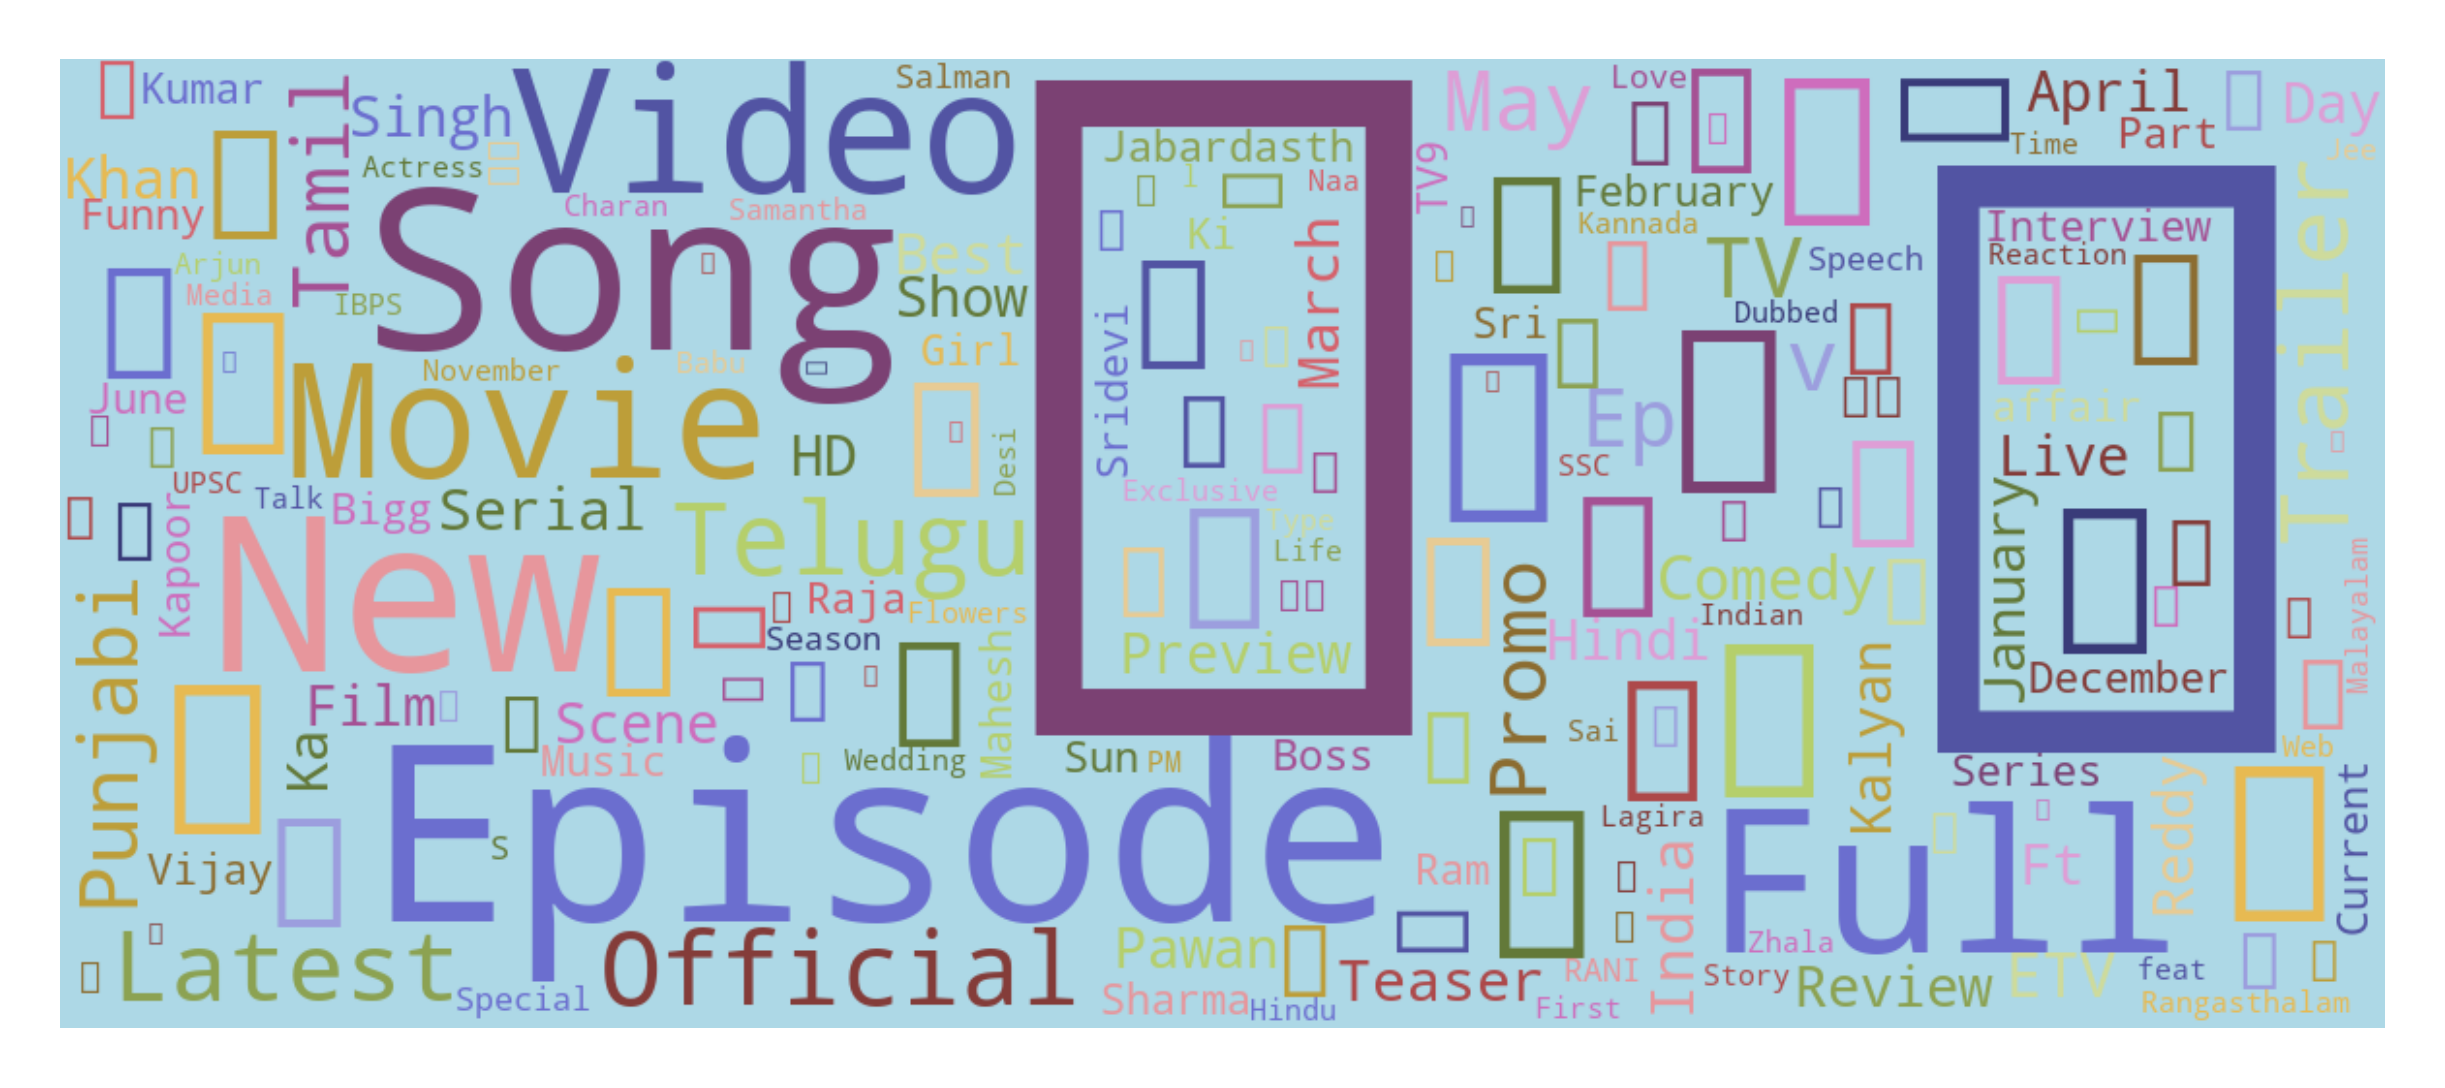

In [12]:
#this data can be represented using a word cloud as: 
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="lightblue", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

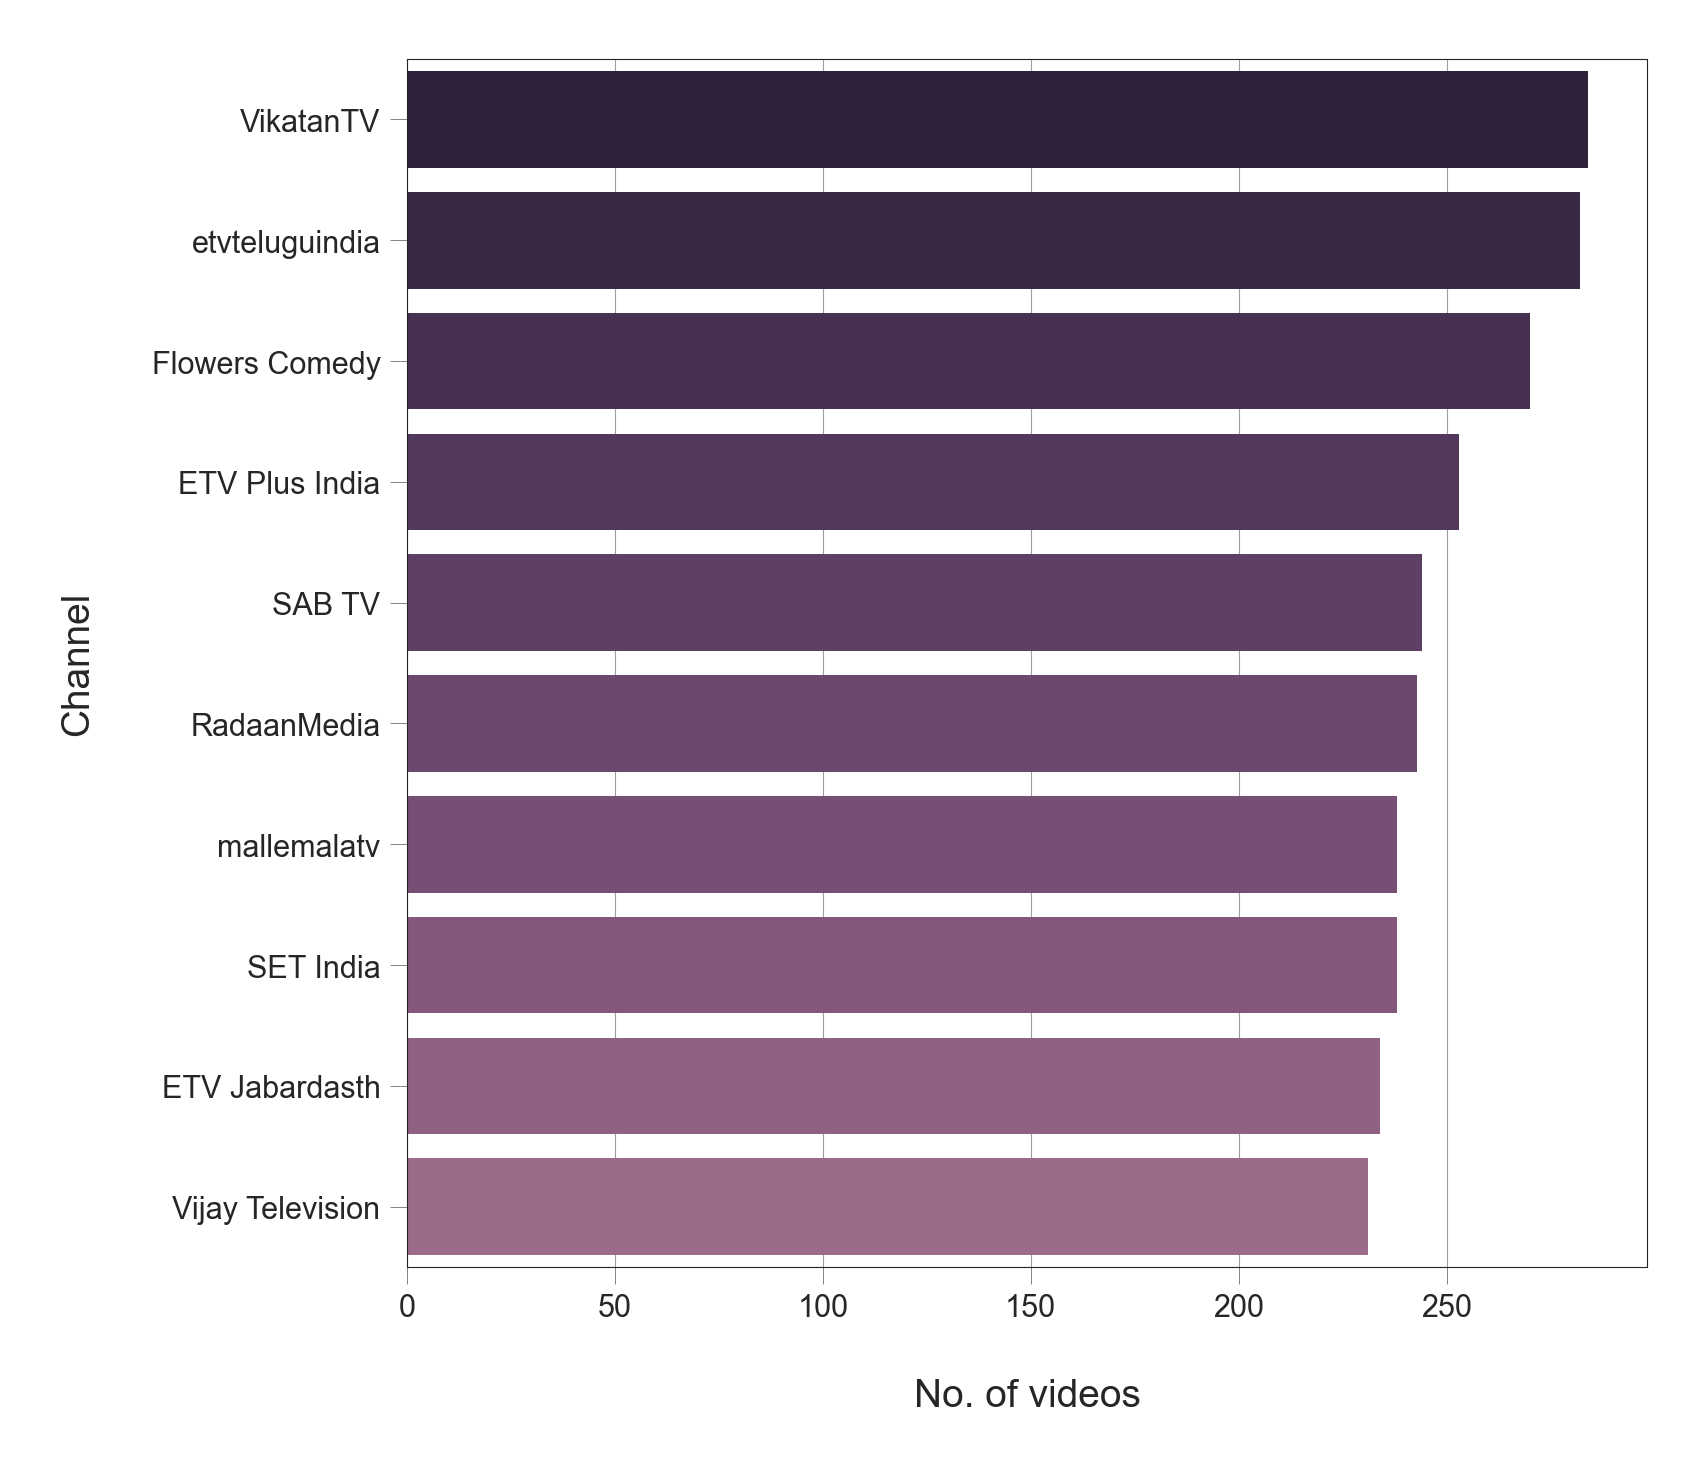

In [16]:
#Q9. Which YouTube channels have the largest number of trending videos?
#to identify the top 10 youtube channels with the largest number of trending videos, we can plot a bar graph between youtube 
#channel names and no. of videos 

cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

#Vikatan TV is the youtube channel with the largest number of trendings videos, i.e., more than 250 trending videos. 
#This is followed by etvteluguindia, Flowers Comedy and ETV Plus India, all having more than 250 trending videos.

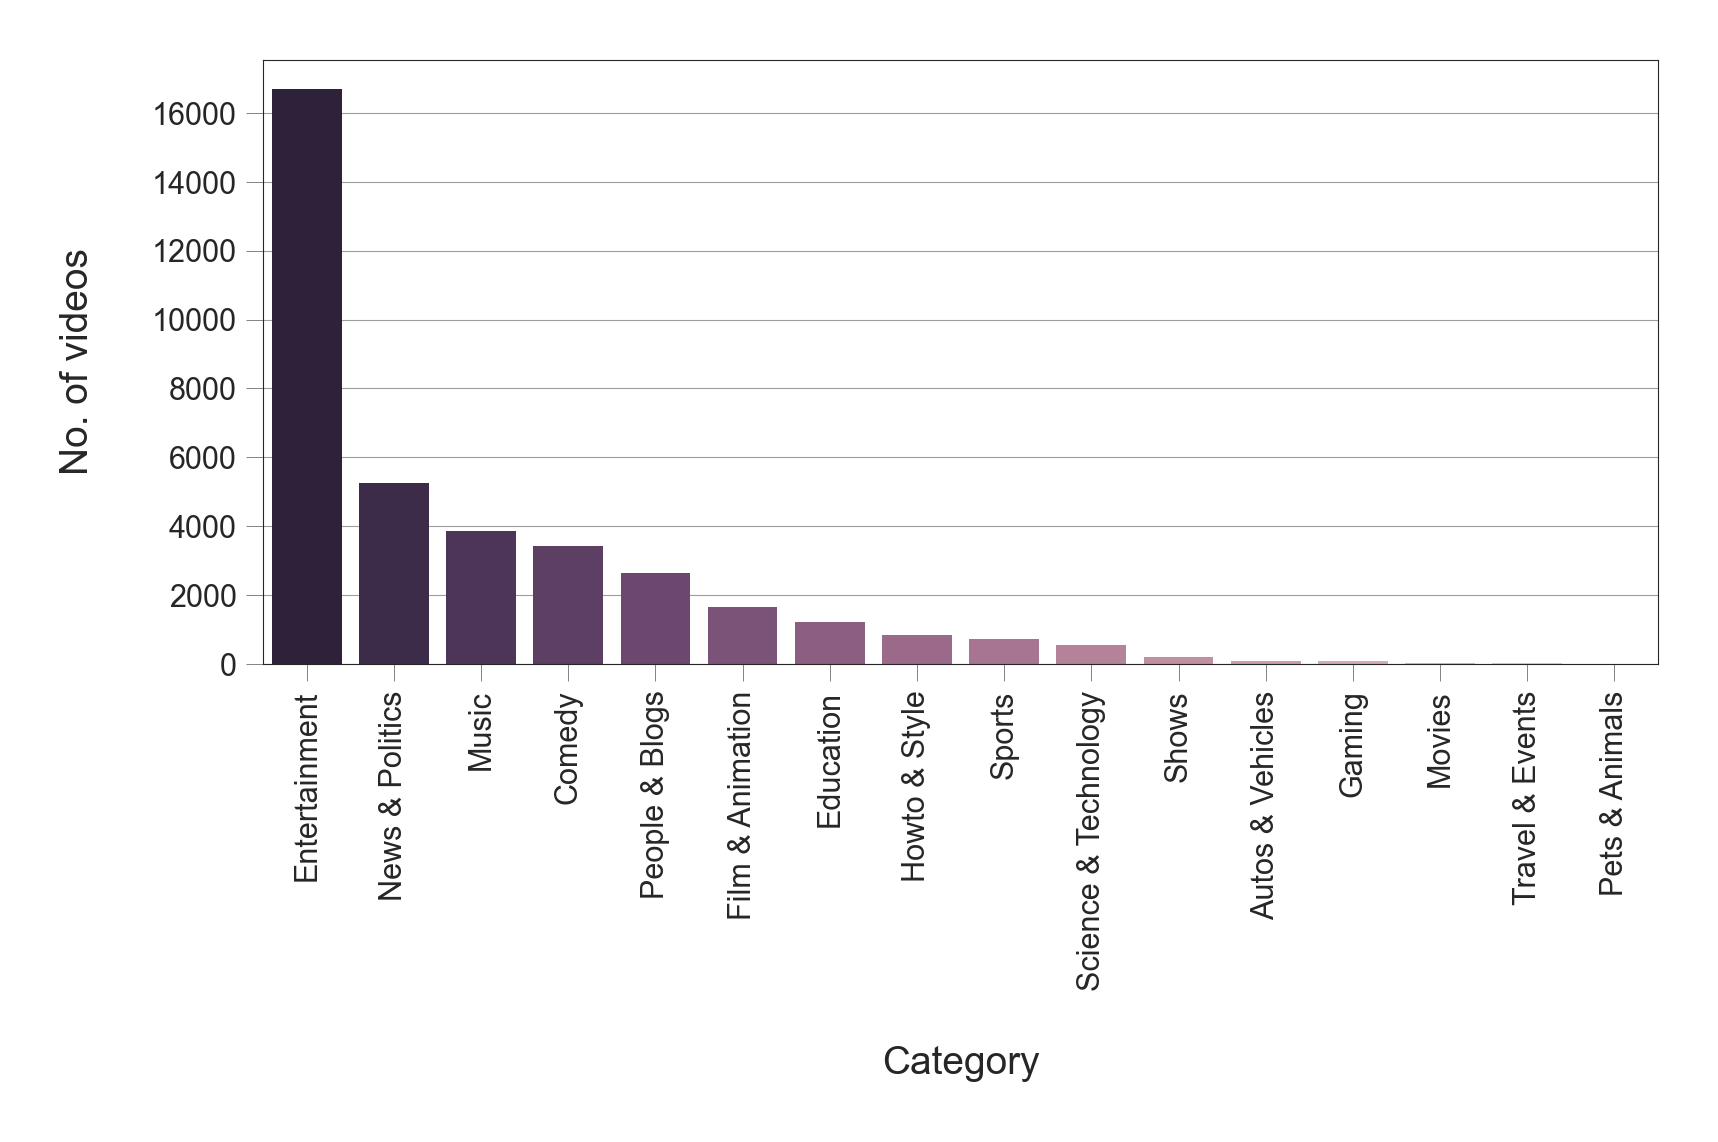

In [18]:
#Q10. Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?

#This can be found out using the json format of data and can represented through a bar graph as the follows: 
with open("C:/Users/Dell/Desktop/SaBaHaT/SMA/lab/IN_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

#from the bar graph, we can conclude that most of the trending videos are from the Entertainment genre. There are about more 
#than 16000 trending videos in the entertainment genre. 

In [67]:
#Q11. When were trending videos published? On which days of the week? at which times of the day?

#to find out when and what time the videos were published, we can use the lambda function to find the publishing time as: 
df["publishing_day"] = df['publish_time'].apply( lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

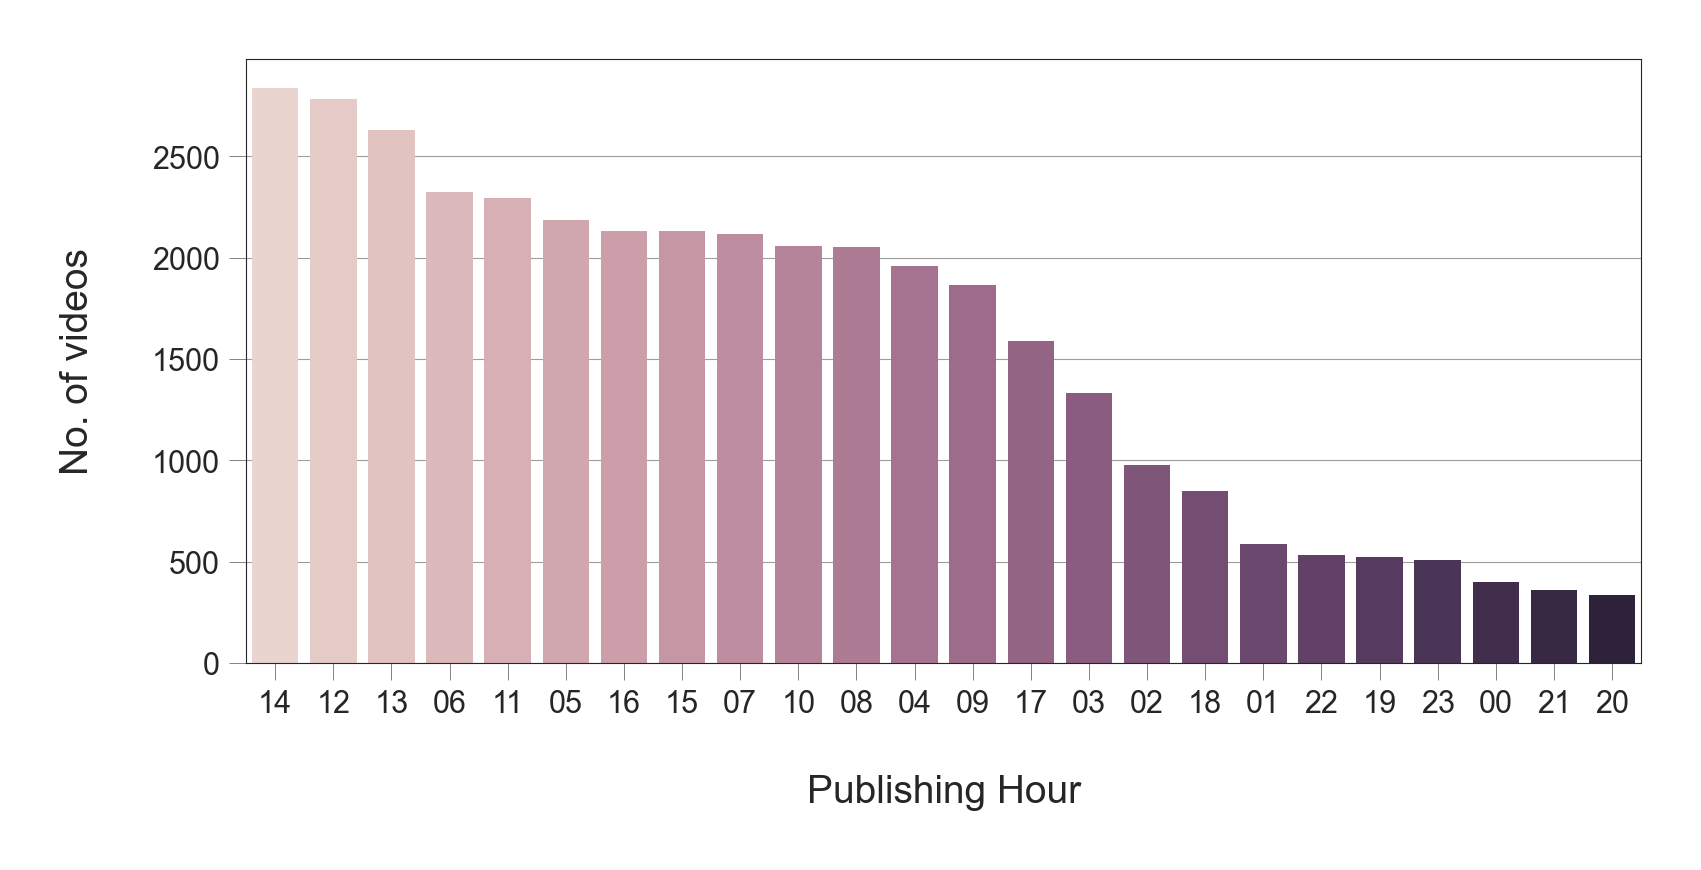

In [68]:
#the publishing time of the videos can be identified by the below graph:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

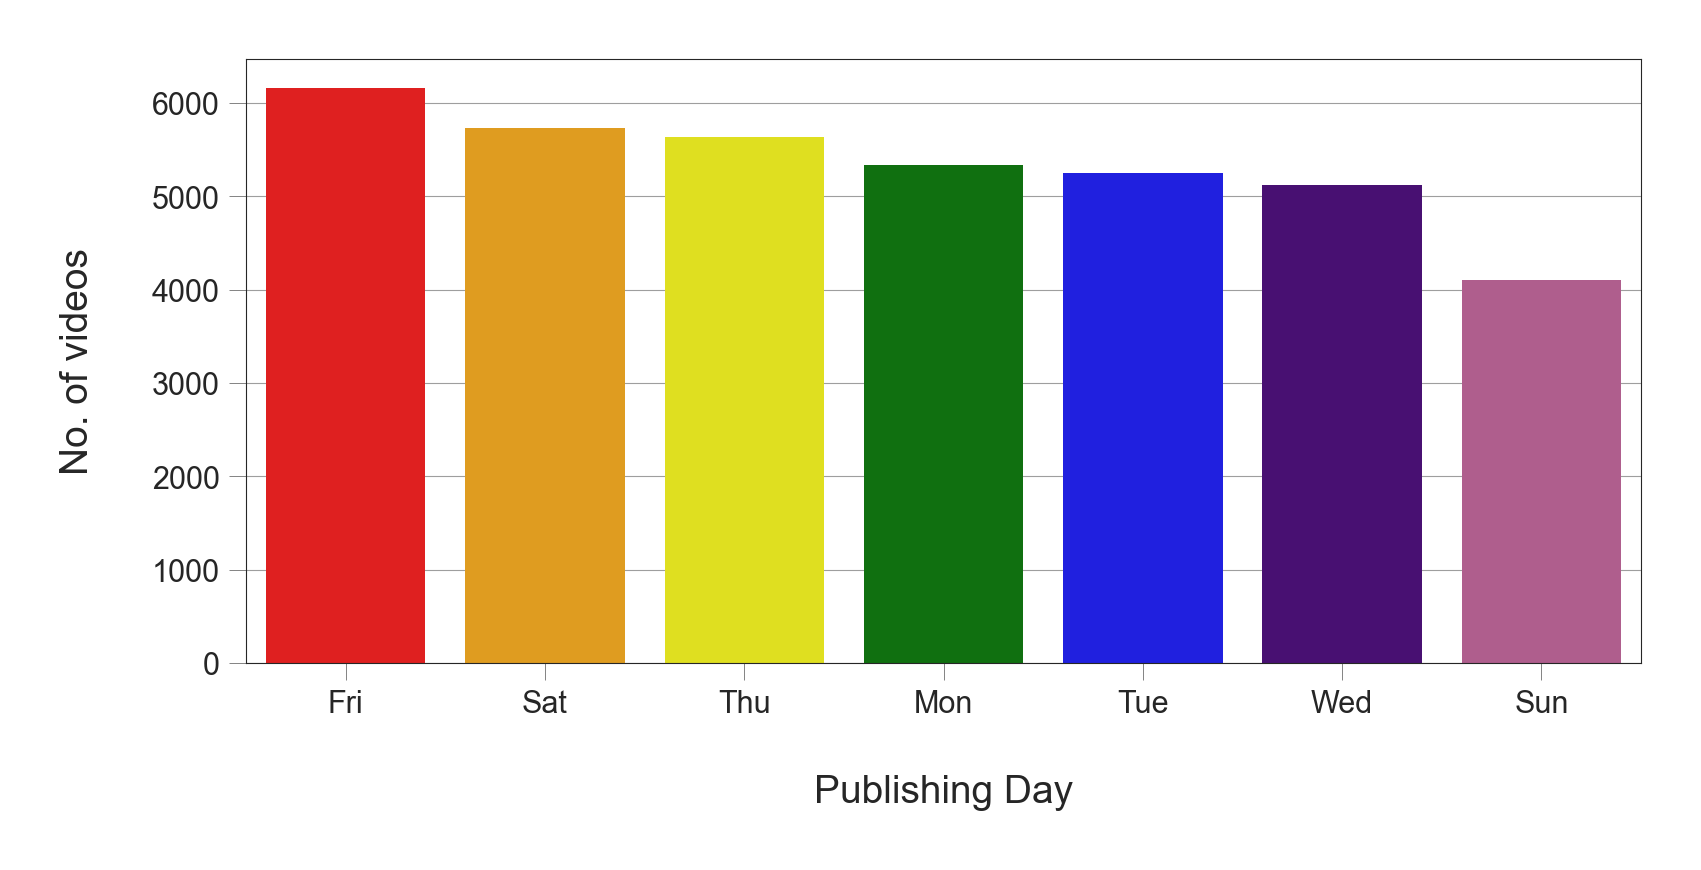

In [23]:
#the publishing days of the trending videos are:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff0000', '#ffa500', '#ffff00','#008000', '#0000ff', '#4b0082', '#bc5090'], 
                                          n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")